In [1]:
from ROOT import TFile, TTree, TH1F, TH2F, TCanvas, kRed
#from ROOT import gROOT, TCanvas, TF1, TFile, TTree, gRandom, TH1F
from utils import rootnotes
from utils import rootprint
import numpy as np

Welcome to ROOTaaS 6.06/02


In [2]:
%%rootprint

inputFile = TFile("../out.root")
tree = inputFile.Get("event")
tree.Print()

******************************************************************************
*Tree    :event     : Tree with event info                                   *
*Entries :    20000 : Total =         8561337 bytes  File  Size =    5579715 *
*        :          : Tree compression factor =   1.53                       *
******************************************************************************
*Br    0 :MET       : MET/D                                                  *
*Entries :    20000 : Total  Size=     160900 bytes  File Size  =      91510 *
*Baskets :        6 : Basket Size=      32000 bytes  Compression=   1.75     *
*............................................................................*
*Br    1 :HT        : HT/D                                                   *
*Entries :    20000 : Total  Size=     160890 bytes  File Size  =     100406 *
*Baskets :        6 : Basket Size=      32000 bytes  Compression=   1.60     *
*...................................................

In [3]:
hMET    = TH1F("MET", "MET", 25, 0. ,5000.)
hHT     = TH1F("HT", "H_{T}", 30, 2000. ,14000.)
hMET_HT = TH2F("MET_HT", "MET vs H_{T}", 20, 0., 5000., 40, 3000., 23000.)
hJet_Pt         = []
hJet_MET_DeltaR = []
hCAJet_Pt       = []
hCAJet_Mass     = []
hFHTop_Pt       = []
hFHTop_Mass     = []
hFHTop_Tau32    = []
for i in range(4):
    hJet_Pt.append(TH1F("Jet"+str(i+1)+"_Pt", "p_{T} of j_{"+str(i+1)+"}", 50, 0., 5000.-1000.*i))
    hJet_MET_DeltaR.append(TH1F("Jet"+str(i+1)+"_MET_DeltaR", "#Delta R ( j_{"+str(i+1)+"}, MET )", 30, 0., 6))
    hCAJet_Pt.append(TH1F("CAJet"+str(i+1)+"_Pt", "p_{T} of C/A j_{"+str(i+1)+"}", 50, 0., 5000.-1000.*i))
    hCAJet_Mass.append(TH1F("CAJet"+str(i+1)+"_Mass", "mass of C/A j_{"+str(i+1)+"}", 50, 0., 1000.))
    hFHTop_Pt.append(TH1F("FHTop"+str(i+1)+"_Pt", "p_{T} of top candidate j_{"+str(i+1)+"} (fully-hadronic decay)", 50, 0., 5000.-1000.*i))
    hFHTop_Mass.append(TH1F("FHTop"+str(i+1)+"_Mass", "mass of top candidate j_{"+str(i+1)+"} (fully-hadronic decay)", 50, 0., 500.))
    hFHTop_Tau32.append(TH1F("FHTop"+str(i+1)+"_Tau32", "#tau_{3}/#tau_{2} of top candidate j_{"+str(i+1)+"} (fully-hadronic decay)", 20, 0., 1.))

for event in tree:
    hMET.Fill(event.MET)
    hHT.Fill(event.HT)
    hMET_HT.Fill(event.MET, event.HT)
    for i in range(min(4,event.Jet_Pt.size())):
        hJet_Pt[i].Fill(event.Jet_Pt[i])
        hJet_MET_DeltaR[i].Fill(event.Jet_MET_DeltaR[i])
    for i in range(min(4,event.CAJet_Pt.size())):
        hCAJet_Pt[i].Fill(event.CAJet_Pt[i])
        hCAJet_Mass[i].Fill(event.CAJet_Mass[i])
    # sort by pT and take first 4 hardest jets
    ordering = np.argsort(np.array(event.FHTop_Pt))[::-1][:4]
    for i in range(len(ordering)):
        hFHTop_Pt[i].Fill(event.FHTop_Pt[ordering[i]])
        hFHTop_Mass[i].Fill(event.FHTop_Mass[ordering[i]])
        hFHTop_Tau32[i].Fill(event.FHTop_Tau32[ordering[i]])

# Normalize histograms
hists = [hMET, hHT, hMET_HT] + hJet_Pt + hJet_MET_DeltaR + hCAJet_Pt + hCAJet_Mass + hFHTop_Pt + hFHTop_Mass + hFHTop_Tau32
for h in hists :
    h.Scale(1/h.Integral())

## Plots for MET and $H_T$ 
* $H_T$ = scalar sum of $p_T$ of all jets ($p_T^{jet}$ > 200 GeV) 
* To do later : optimize in $H_T$-MET parameter space to increase significance for each grid point

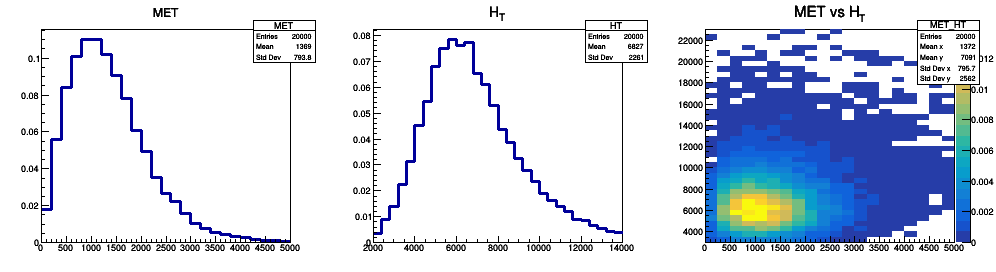

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmpy857Aj.png has been created


In [4]:
c1 = rootnotes.canvas(size=(1000,300))
c1.Divide(3)
c1.cd(1)
hMET.Draw()
c1.cd(2)
hHT.Draw()
c1.cd(3)
hMET_HT.Draw("colz")
c1

## $p_T$ of leading jets (anti-$k_T$ with R=0.5)

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


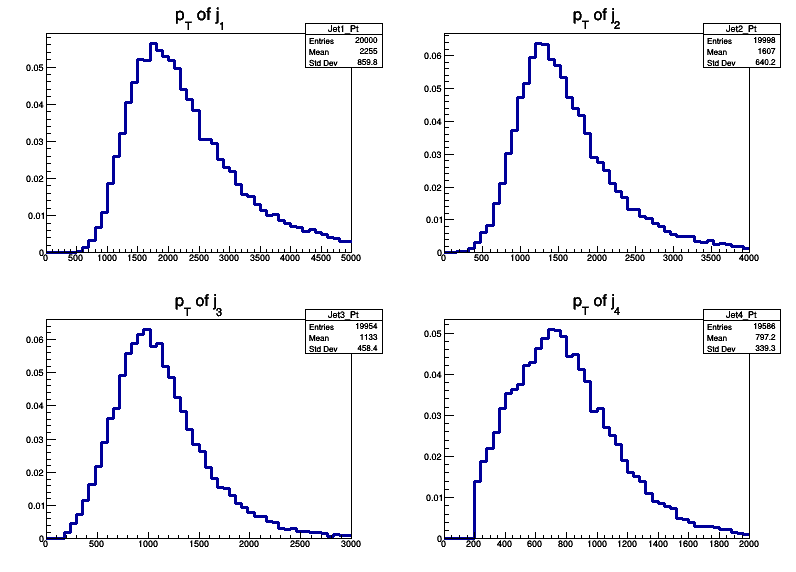

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmp5dah_e.png has been created


In [5]:
c2=rootnotes.canvas()
c2.Divide(2,2)
for i in range(4):
    c2.cd(i+1)
    hJet_Pt[i].Draw()
c2

## $\Delta R (j, MET)$ for the leading four anti-$k_T$ jets
* Veto $\Delta R (j, MET) < 0.5$ to reduce W+jets background

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


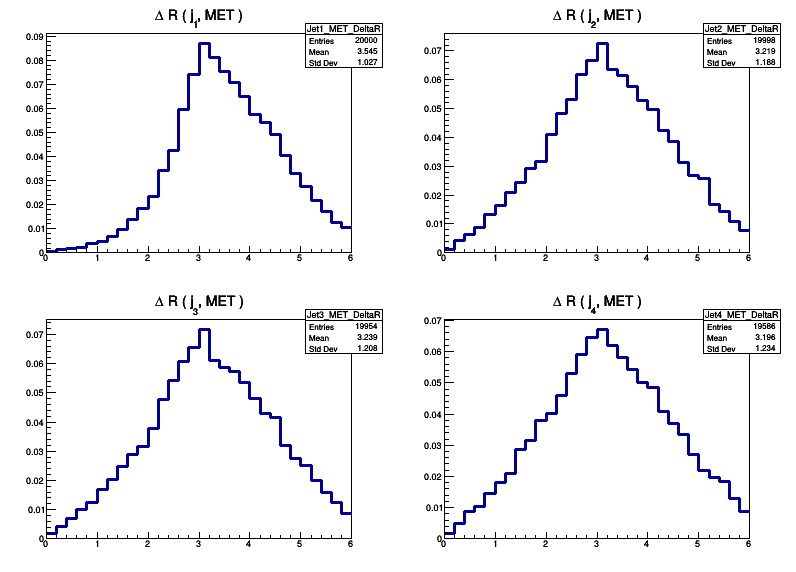

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmpimIOXr.png has been created


In [6]:
c3=rootnotes.canvas()
c3.Divide(2,2)
for i in range(4):
    c3.cd(i+1)
    hJet_MET_DeltaR[i].Draw()
c3

## $p_T$ of C/A jats with R=0.8 (fat-jets)

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


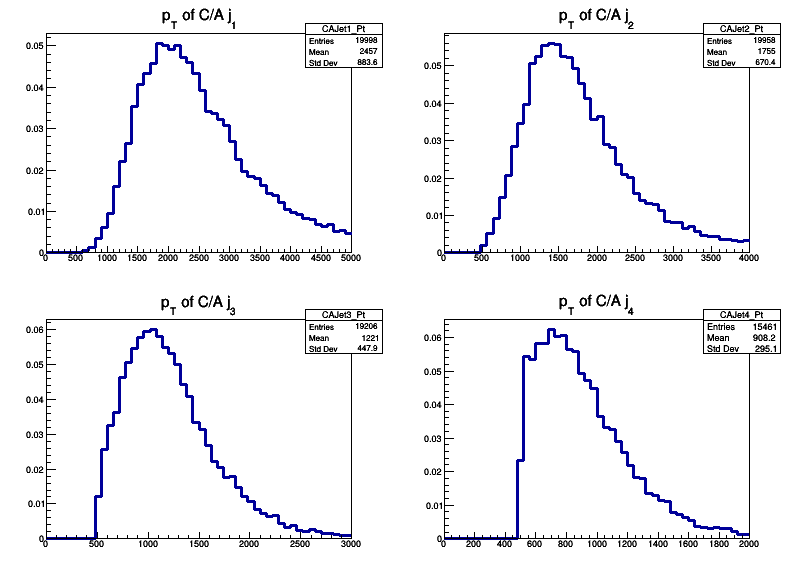

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmpquBfyi.png has been created


In [7]:
c4=rootnotes.canvas()
c4.Divide(2,2)
for i in range(4):
    c4.cd(i+1)
    hCAJet_Pt[i].Draw()
c4

## Mass of C/A jats with R=0.8 (fat-jets)
* Note that the jet mass is **particle-flow mass** i.e. full information about tracks and towers is used

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


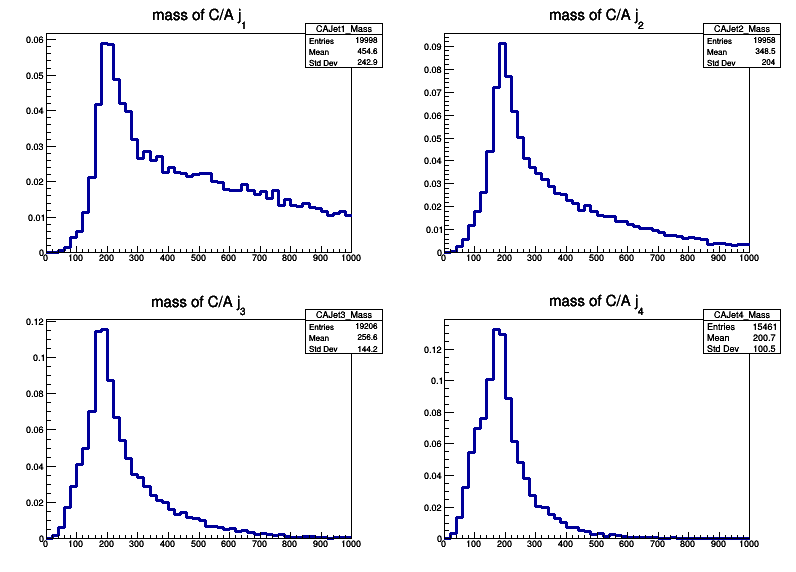

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmpG_4Fvt.png has been created


In [8]:
c5=rootnotes.canvas()
c5.Divide(2,2)
for i in range(4):
    c5.cd(i+1)
    hCAJet_Mass[i].Draw()
c5

# Jet-subsctructure :
* Each C/A jet is a possible top candidate
* Check if there is a muon inside the C/A jet with $p_T$ > 200 GeV :
    * If yes : We have a semi-letonic (SL) top candidate 
    * If no : We re-cluster the C/A jet using anti-$k_T$ algorithm 
    and Winner-Takes-All (WTA) recombination scheme for pile-up considerations
    with a smaller **dynamic radius** $$ R_{sub} = \frac{600 GeV}{p_T^{jet}} $$
    and the resulting jets with $p_T$>500 GeV are labeled fully-hadronic (FH) top candidate
* First, we look at FH top candidates 
## $p_T$ of FH top candidates (leading four jets)

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


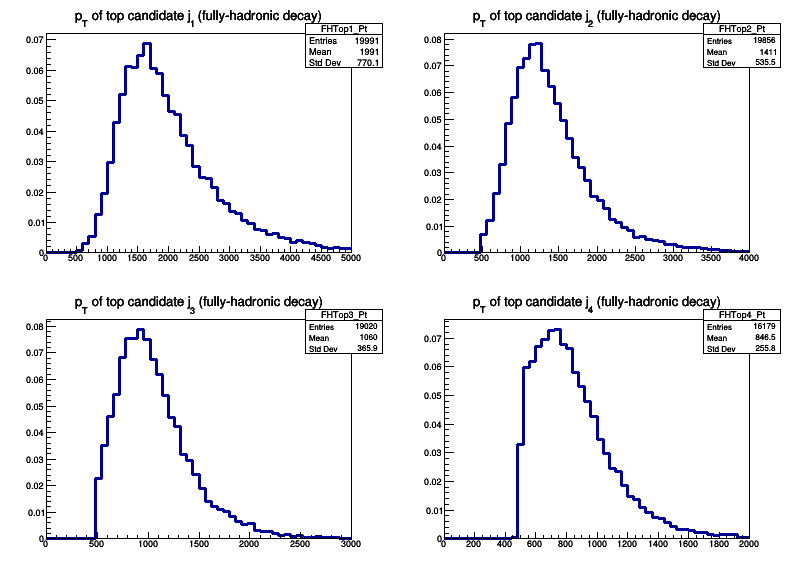

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmpp3_FVk.png has been created


In [9]:
c6=rootnotes.canvas()
c6.Divide(2,2)
for i in range(4):
    c6.cd(i+1)
    hFHTop_Pt[i].Draw()
c6

## mass of FH top candidate (leading four jets)
* As before, we use full particle-flow information with one difference :
* For jets with $p_T$ > 1 TeV, 
    $$m^{jet} = m^{tracks} \frac{p_T^{jet}}{p_T^{tracks}}$$

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


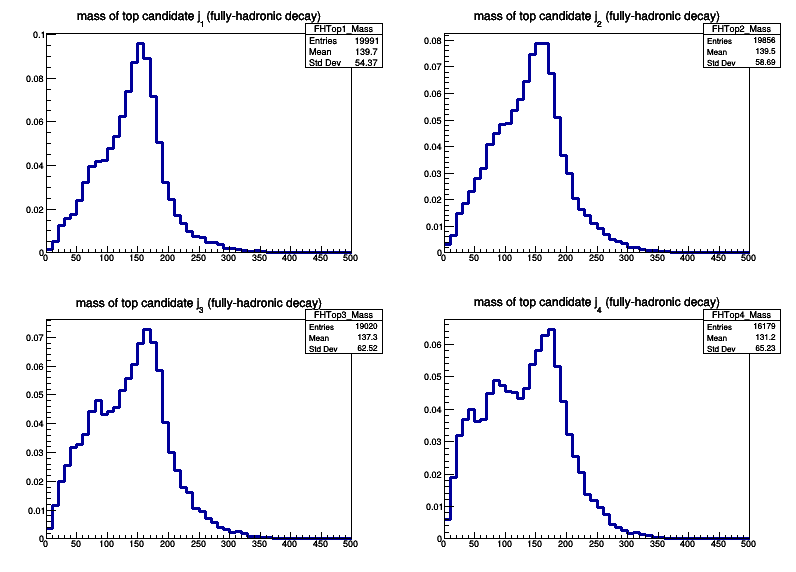

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmpDdBJcu.png has been created


In [10]:
c7=rootnotes.canvas()
c7.Divide(2,2)
for i in range(4):
    c7.cd(i+1)
    hFHTop_Mass[i].Draw()
c7

### Effect of using dyamic radius is shown below :
* We get a decent top mass reconstruction after using dyamic radius which removes soft crap
* Reconstruction starts to degrade after 3rd leading jet probably because some QCD jets are picked up
* In actaul analysis, we check for FH top candidates in leading 6-jets (provided $p_T$ > 500 GeV)

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


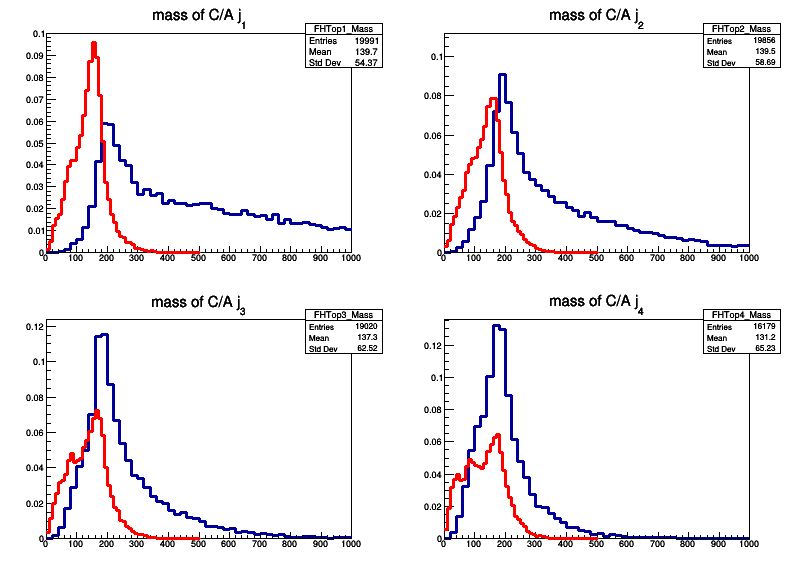

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmpfngpEu.png has been created


In [17]:
c8=rootnotes.canvas()
c8.Divide(2,2)
for i in range(4):
    c8.cd(i+1)
    hCAJet_Mass[i].GetYaxis().SetRangeUser(0.,.1+i*.012)
    hCAJet_Mass[i].Draw()
    hFHTop_Mass[i].SetLineColor(kRed);
    hFHTop_Mass[i].Draw("same")
c8

## N-subjettiness : $\tau_3 / \tau_2$
* Again, we use full **particle-flow** information
* For jets with $p_T$ > 1 TeV, we only use tracks
* We use onepass WTA $k_{T}$ axes. $\beta$ > 2 seems to work well, we choose $\beta$ = 2.7
*  $\tau_3 / \tau_2$ for QCD jets is expected to peak closer to 1

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: icanvas


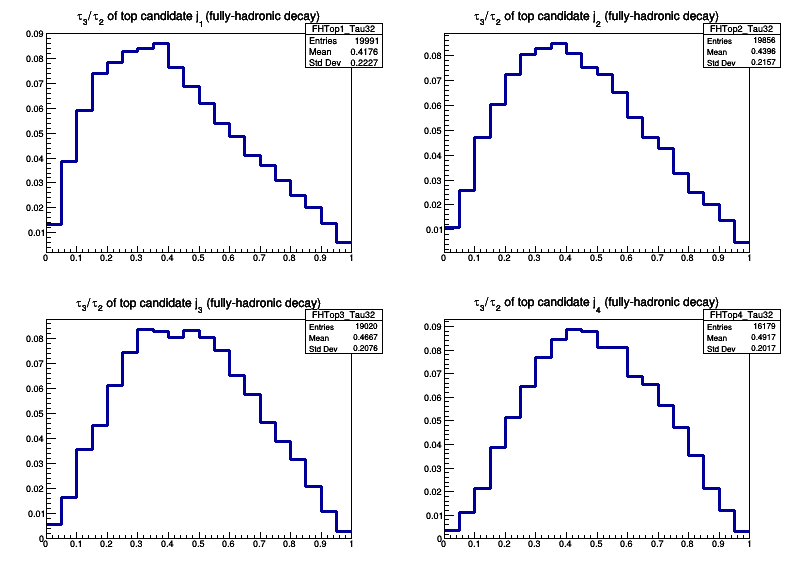

Info in <TCanvas::Print>: png file /var/folders/_r/z89y9x9j7cv8h_9n9l58gd8c0000gn/T/tmpQvCQb4.png has been created


In [13]:
c9=rootnotes.canvas()
c9.Divide(2,2)
for i in range(4):
    c9.cd(i+1)
    hFHTop_Tau32[i].Draw()
c9